# Libraries

In [38]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Import

In [39]:
file_path = 'Datasets/WineQualityDuplicate.csv'
df = pd.read_csv(r"Datasets\\WineQualityDuplicate.csv")

# Feature Seperation

In [40]:
X = df.drop(columns=['quality'])
y = df['quality']

# Train Test Split

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Training

In [42]:
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

# Prediction

In [43]:
y_pred = rf_classifier.predict(X_test)

# Accuracy

In [44]:
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [45]:
print(f"Accuracy: {accuracy:.2f}")
print("Classification Report:")
print(report)

Accuracy: 0.73
Classification Report:
              precision    recall  f1-score   support

           4       1.00      0.14      0.25         7
           5       0.75      0.77      0.76        78
           6       0.68      0.85      0.76       125
           7       0.82      0.47      0.60        49
           8       1.00      0.55      0.71        11

    accuracy                           0.73       270
   macro avg       0.85      0.55      0.61       270
weighted avg       0.75      0.73      0.71       270



# Visualization

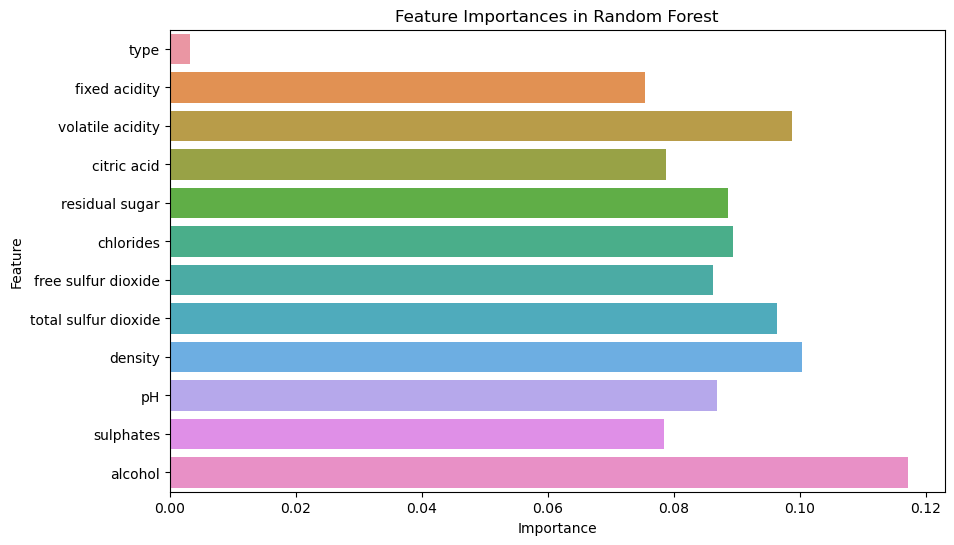

In [46]:
feature_importances = rf_classifier.feature_importances_
features = X.columns
plt.figure(figsize=(10, 6))
sb.barplot(x=feature_importances, y=features)
plt.title('Feature Importances in Random Forest')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In the feature importance chart, it is found that the two most important factors to predicting the quality was the alcohol level, meanwhile the other features apart from type, all had relative importance, while type had the least importance.

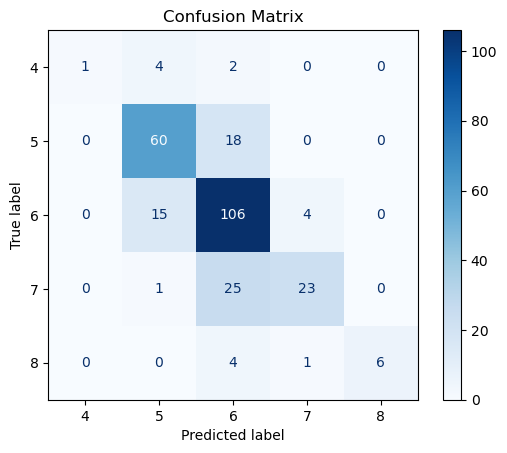

In [47]:
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=rf_classifier.classes_)
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

Class 6 was predicted the best and has the highest umber of true and predicted labels, while class 4 performs the worst and many were misclasified as 5.

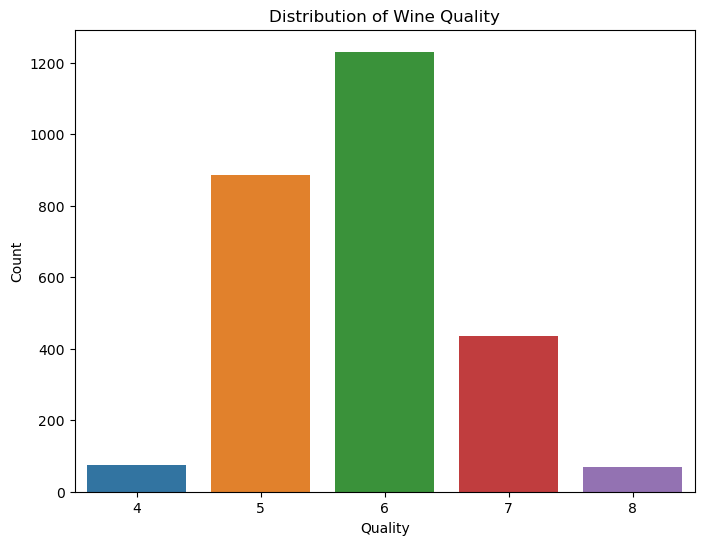

In [48]:
plt.figure(figsize=(8, 6))
sb.countplot(x='quality', data=df)
plt.title('Distribution of Wine Quality')
plt.xlabel('Quality')
plt.ylabel('Count')
plt.show()